In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
x_range = 4.2
spatial_resolution = 50
temporal_resolution = 500
noise_resolution = 100

temporal_display_scale = 150
noise_display_scale = 20

a = 1.8
b = 1
A = 0.8

noise_scale = 0.075

In [50]:
def u(x, t):
  return -a * 0.5 * (x**2) + b * 0.25 * (x**4) + A * x * np.sin(t)

x = np.linspace(-x_range/2, x_range/2, spatial_resolution)
t = np.linspace(0, np.pi, temporal_resolution)
y = np.array([u(x, t_) for t_ in t])


In [51]:
def calculate_local_minimas():
  # Calculate the noise and the noise-y array
  noise = np.array([noise_scale * scale * np.random.normal(0, .1, y.shape) for scale in range(noise_resolution)])
  noise_y_array = np.array([np.array([y[idx] + noise_[idx] for idx in range(len(y))]) for noise_ in noise])

  # Calculate the local minimas
  local_minima_position = np.array([np.array([int(0.82*spatial_resolution) for _ in t]) for _ in noise])

  for noise_idx in range(len(noise)):
    for t_idx in range(len(t)):
      searching = True
      x_idx = local_minima_position[noise_idx][t_idx - 1]
      while searching:
        if x_idx - 1 < 0 or x_idx + 1 > len(noise_y_array[noise_idx][t_idx]):
          searching = False
        else:
          min_index = np.argmin(noise_y_array[noise_idx][t_idx][x_idx - 1:x_idx + 2])
          if min_index == 0:
            x_idx -= 1
          elif min_index == 1:
            searching = False
          else:
            x_idx += 1

      # for x_idx in range(len(x) - 1):
      local_minima_position[noise_idx][t_idx] = x_idx

  return noise_y_array, local_minima_position

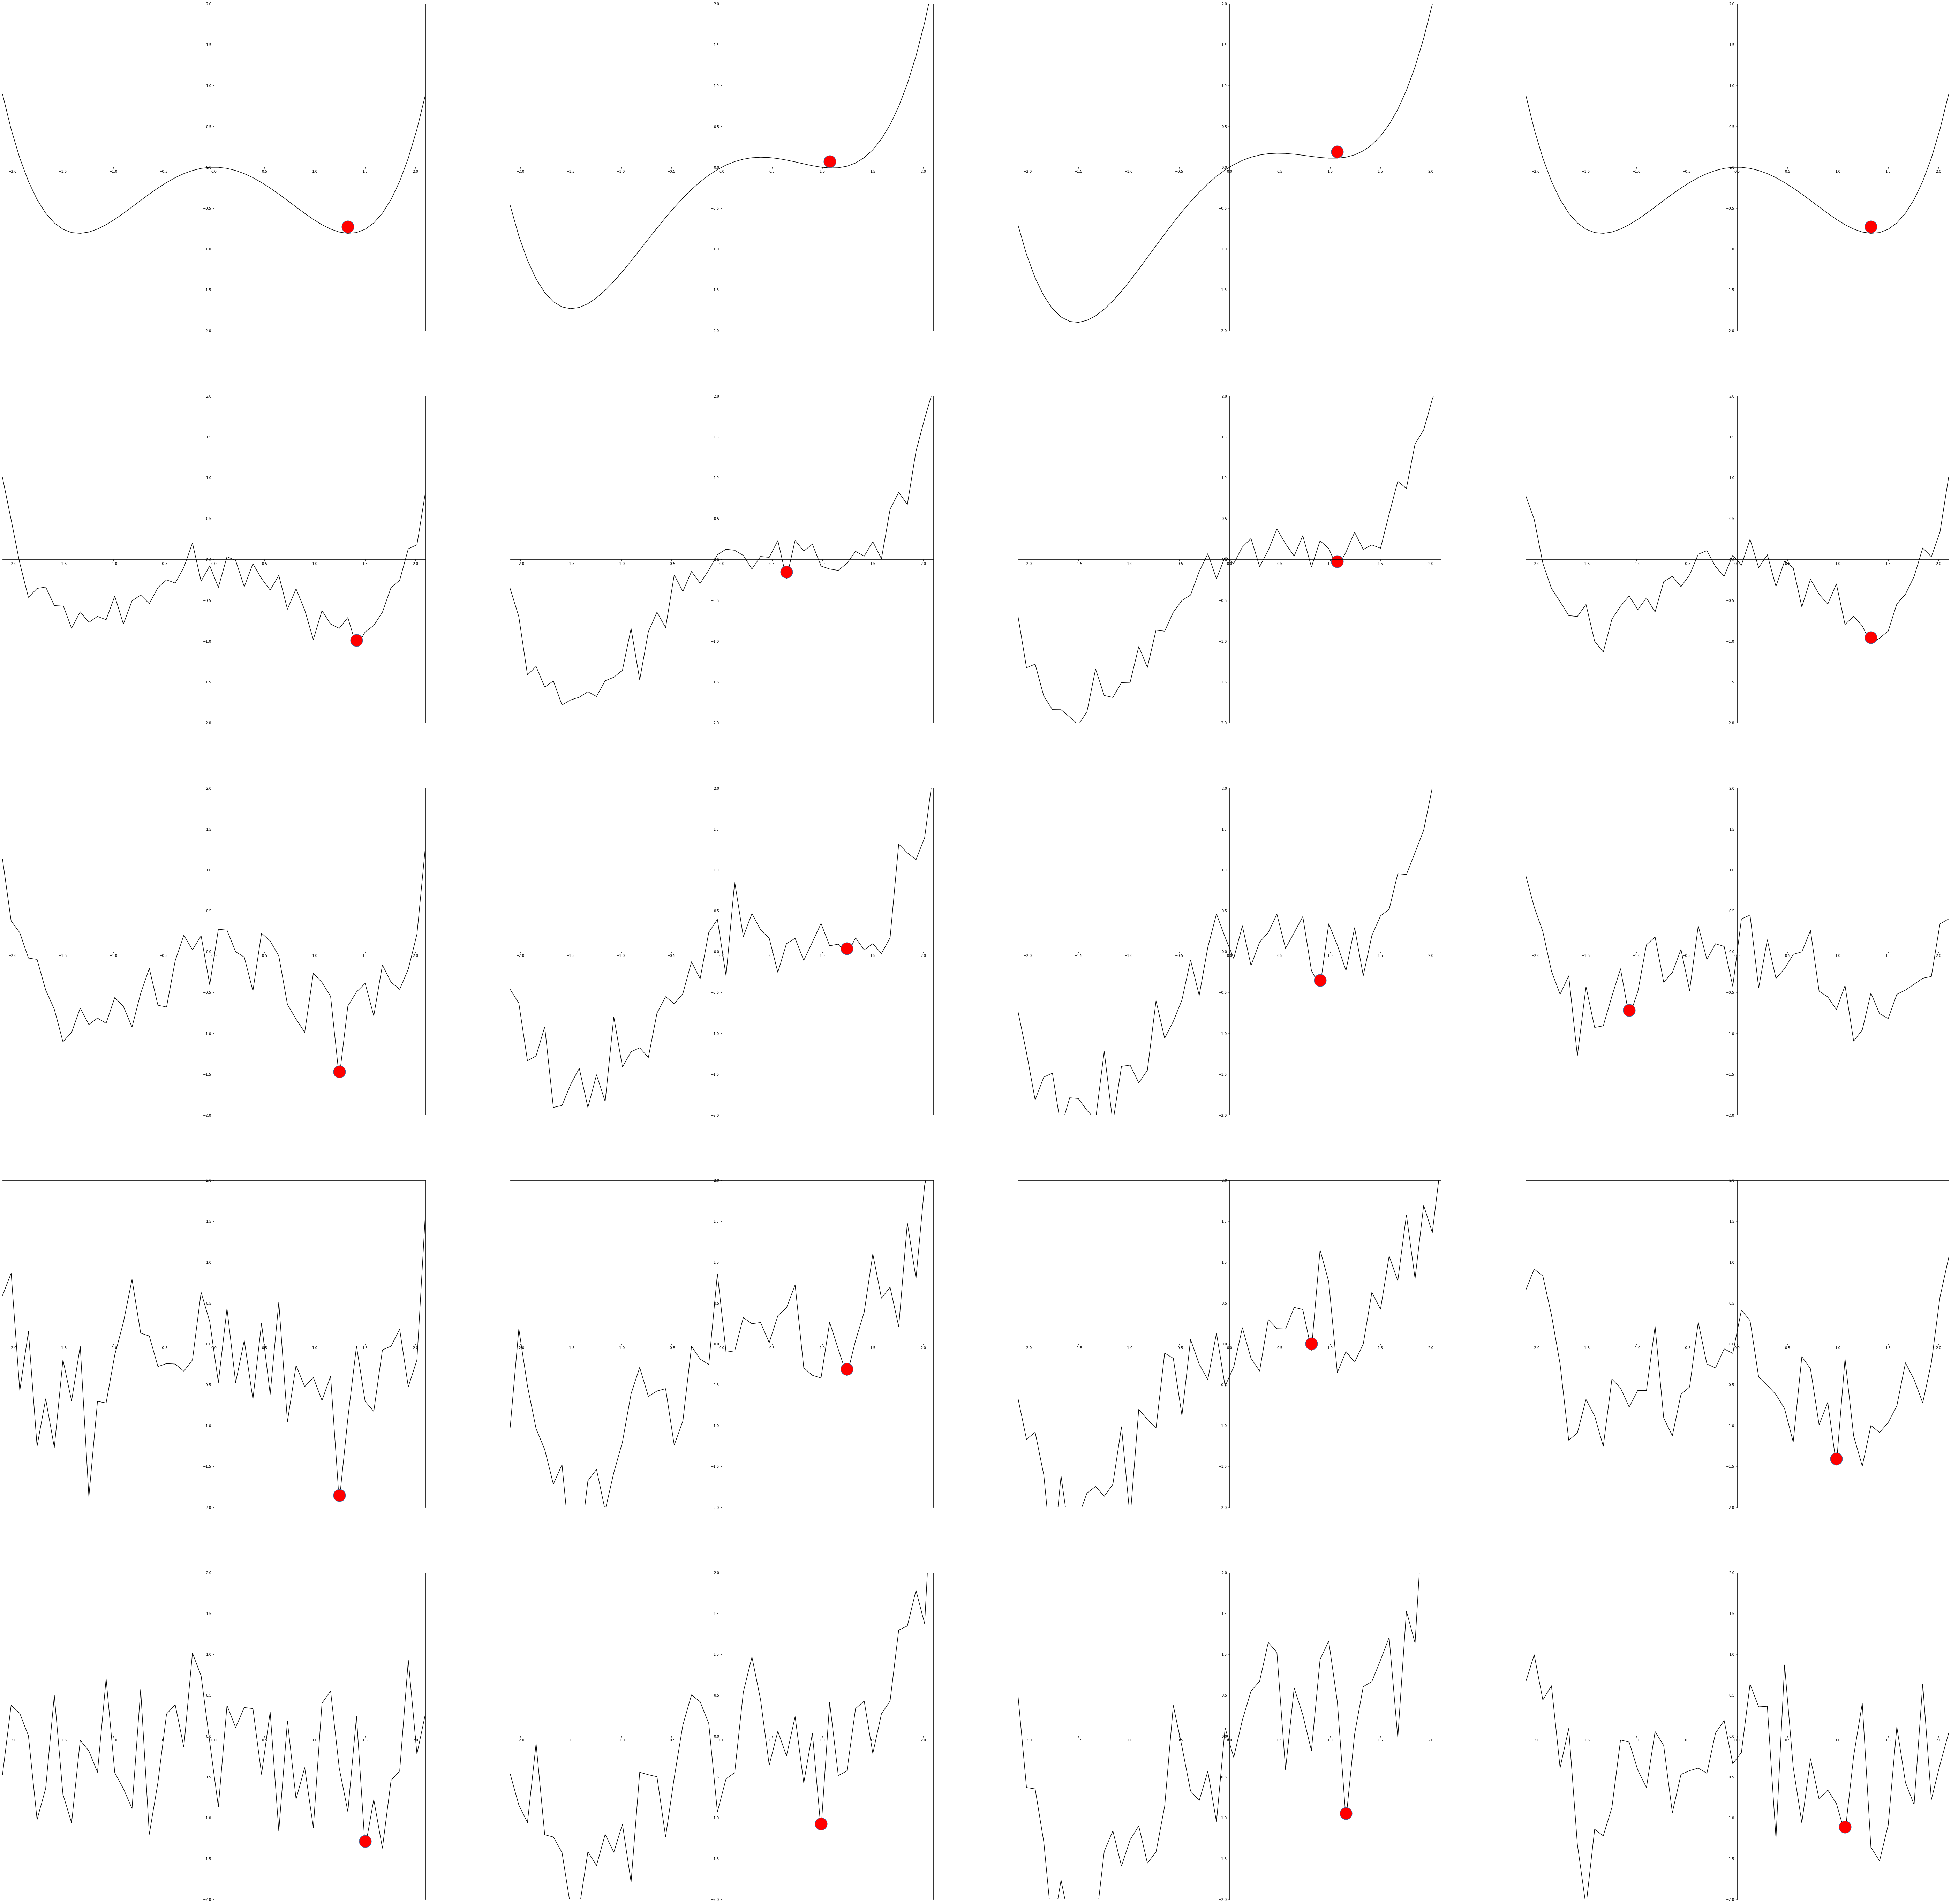

In [61]:
noise_y_array, local_minima_position = calculate_local_minimas()

# Function to plot on a set of axes
def plot(ax, x_data, y_data, minima):
  ax.plot(x_data, y_data, color='black')
  ax.plot(x_data[minima], y_data[minima] + 0.08, marker="o", markersize=35, markerfacecolor="red")
  ax.set_xlim(-x_range/2, x_range/2)
  ax.set_ylim(-2, 2)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')

# Create some sublots
horizontal_subplot_count = int(temporal_resolution/temporal_display_scale)
vertical_subplot_count = int(noise_resolution/noise_display_scale)
fig, ax = plt.subplots(vertical_subplot_count, horizontal_subplot_count + 1, figsize=(100, 100))

for j in range(vertical_subplot_count):
  for i in range(horizontal_subplot_count):
    plot(ax[j][i], x, noise_y_array[j*noise_display_scale][i*temporal_display_scale], local_minima_position[j*noise_display_scale][i*temporal_display_scale])

  plot(ax[j][-1], x, noise_y_array[j*noise_display_scale][-1], local_minima_position[j*noise_display_scale][-1])

plt.show()

In [63]:
iterations = 500

average_in_band = None

for i in range(iterations):
  noise_y_array, local_minima_position = calculate_local_minimas()

  lower_bound = int(0.1  * spatial_resolution)
  upper_bound = int(0.28 * spatial_resolution)

  in_band = np.array([1 if minimas[-1] > lower_bound and minimas[-1] < upper_bound else 0 for minimas in local_minima_position])

  if average_in_band is None:
    average_in_band = in_band
  else:
    average_in_band += in_band

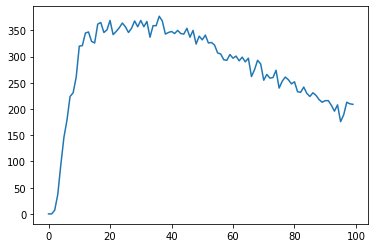

In [64]:
plt.plot(average_in_band)
plt.show()